### Auther -  Kaustubh Joshi 

# -------------------------------------------------------------------------------------------------------------

# Case Definition - 

The goal here is basically calculating the statistical distance between two measurements given by two different sensors to determine the association between them. For the sake of definition completion let's use "SENSOR1" and "SENSOR1" as two sensors

# Mahalanobis Distance - 

-- Taken from wikipedia--

The Mahalanobis distance is a measure of the distance between a point P and a distribution D, introduced by P. C. Mahalanobis in 1936.[1] It is a multi-dimensional generalization of the idea of measuring how many standard deviations away P is from the mean of D. This distance is zero if P is at the mean of D, and grows as P moves away from the mean: along each principal component axis, it measures the number of standard deviations from P to the mean of D. If each of these axes is rescaled to have unit variance, then Mahalanobis distance corresponds to standard Euclidean distance in the transformed space. Mahalanobis distance is thus unitless and scale-invariant, and takes into account the correlations of the data set.

<img src="MahalanobisWiki.jpg">

Here most important point to note is the line stating *"where si is the standard deviation of the xi and yi over the sample set."* . **Mahalanobis distance calculations assume the standard deviations of two distributions are exactly same**. We will come back to this point later in article

# Using Mahalanobis Distance Pit Fall - 1

Let's say that, SENSOR1 and SENSOR1 are having exact same error distribution (I know it's not the case but let's assume it right now) with covariance matrices COVMAT_SENSOR1 and COVMAT_SENSOR1. Now the first mistake commonly done while calculating Mahalanobis distance is adding these two covariance matrices to get resulting Covariance Matrix.
### WRONG!!
Its basically avarage. And avarage works out correctly because we have assumed COVMAT_SENSOR1 = COVMat_SENSOR1
So, 

(COVMat_SENSOR1 + COVMAT_SENSOR1)/2 = COVMAT_SENSOR1 = COVMAT_SENSOR1

#### Let's prove it experimentally

In [194]:
import numpy as np
get_ipython().magic('matplotlib inline')
COVMat_SENSOR1 = np.array([[16, 0], [0, 4]])  ## Covariance matrix of SENSOR1
CENTER_SENSOR1 = np.array([0,0]) ## Measurement point from SENSOR1

COVMat_SENSOR1 = np.array([[16, 0], [0, 4]])  ## Covariance matrix of SENSOR1
CENTER_SENSOR2 = np.array([1,1]) ## Measurement point from SENSOR1

## As described here COVMat_SENSOR1 = COVMat_SENSOR1
## Let's calculate Mahalanobis distance by adding the Covariance matrices
COVMAT_COMBINED = COVMat_SENSOR1 + COVMat_SENSOR1

import scipy.spatial.distance

Inv_COVMAT_COMBINED = np.linalg.inv(COVMAT_COMBINED)

MahalanobisDistance = scipy.spatial.distance.mahalanobis(CENTER_SENSOR1,CENTER_SENSOR2,Inv_COVMAT_COMBINED)

print("Mahalanobis distance by adding the covariances = " + str(MahalanobisDistance))

## Let's now take avarage and calculate Mahalanobis distance
COVMAT_COMBINED = (COVMat_SENSOR1 + COVMat_SENSOR1)/2
Inv_COVMAT_COMBINED = np.linalg.inv(COVMAT_COMBINED)
MahalanobisDistance = scipy.spatial.distance.mahalanobis(CENTER_SENSOR1,CENTER_SENSOR2,Inv_COVMAT_COMBINED)

print("Mahalanobis distance by avaraging the covariances = " + str(MahalanobisDistance))

Mahalanobis distance by adding the covariances = 0.395284707521
Mahalanobis distance by avaraging the covariances = 0.559016994375


So by adding the covariances the less mahalanobis distance is getting calculated which can result in higher associations in  Algo.

But still we have not proved which one of these is correct distance. Let's prove that now

In [195]:
## Point cloud from sensor1 and sensor2 error distribution
SENSOR1_POINTCLOUD = np.random.multivariate_normal(CENTER_SENSOR1, COVMat_SENSOR1, (10000))
SENSOR1_POINTCLOUD = np.random.multivariate_normal(CENTER_SENSOR1, COVMat_SENSOR1, (10000))

## Let's combine these distributions
COMBINED_CLOUD = np.concatenate((SENSOR1_POINTCLOUD, SENSOR1_POINTCLOUD))

## Resulting Covariance matrix
COVMAT_COMBINED = np.cov(COMBINED_CLOUD.T)

## Let's calculate mahalanobis distance
Inv_COVMAT_COMBINED = np.linalg.inv(COVMAT_COMBINED)
MahalanobisDistance = scipy.spatial.distance.mahalanobis(CENTER_SENSOR1,CENTER_SENSOR2,Inv_COVMAT_COMBINED)
print(" Ground Truth Mahalanobis distance  = " + str(MahalanobisDistance))



 Ground Truth Mahalanobis distance  = 0.566409843731


So, the Mahalanobis distance obtained by avaraging the covariance matrices is matching the ground truth mahalanobis distance. This proves that adding covariance matrices is wrong
# CONCLUSION - DO NOT ADD COVARIANCE MATRICES TO GET COMBINED ERROR DISTRIBUTION

# Using Mahalanobis Distance Pit Fall - 2

As stated at start of the article, for using mahalanobis distance it is necessary to have same standard deviation for both distributions. What happens we ignore this as use mahalanobis distance to calculate the statistical distance? Let's check!

In [196]:
## CASE - 1 - Two exactly same but non centered distributions
COVMat_SENSOR1_1 = np.array([[4, 0], [0, 36]])  ## Covariance matrix of SENSOR1
CENTER_SENSOR1_1 = np.array([0,0]) ## Measurement point from SENSOR1

COVMat_SENSOR2_1 = np.array([[4, 0], [0, 36]])  ## Covariance matrix of SENSOR1
CENTER_SENSOR2_1 = np.array([15,0]) ## Measurement point from SENSOR1

COVMAT_COMBINED_CASE_1 = (COVMat_SENSOR1_1 + COVMat_SENSOR2_1)/2

## CASE - 2 - Two non similar , non centered distributions
COVMat_SENSOR1_2 = np.array([[4, 0], [0, 36]])  ## Covariance matrix of SENSOR1
CENTER_SENSOR1_2 = np.array([0,0]) ## Measurement point from SENSOR1

COVMat_SENSOR2_2 = np.array([[4, 0], [0, 8]])  ## Covariance matrix of SENSOR1
CENTER_SENSOR2_2 = np.array([15,0]) ## Measurement point from SENSOR1

COVMAT_COMBINED_CASE_2 = (COVMat_SENSOR1_2 + COVMat_SENSOR2_2)/2


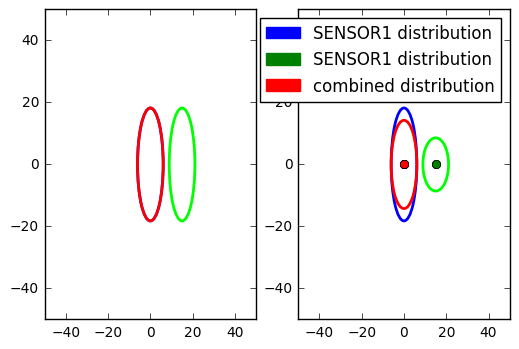

In [197]:
import ErrorEllipse
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, axs = plt.subplots(1,2)

ax=axs[0]
ax.set_xlim([-50,50])
ax.set_ylim([-50,50])
ErrorEllipse.plot_cov_ellipse(COVMat_SENSOR1_1, CENTER_SENSOR1_1,volume=0.99, ax=ax,ec=[0,0,1])
plt.plot(CENTER_SENSOR1_1[0],CENTER_SENSOR1_1[1],'ro',color = 'b')

ErrorEllipse.plot_cov_ellipse(COVMat_SENSOR2_1, CENTER_SENSOR2_1,volume=0.99, ax=ax,ec=[0,1,0])
plt.plot(CENTER_SENSOR2_1[0],CENTER_SENSOR2_1[1],'ro',color = 'g')

ErrorEllipse.plot_cov_ellipse(COVMAT_COMBINED_CASE_1, CENTER_SENSOR1_1,volume=0.99, ax=ax,ec=[1,0,0])
plt.plot(CENTER_SENSOR1_1[0],CENTER_SENSOR1_1[1],'ro',color = 'r')


blue_patch = mpatches.Patch(color='blue', label='SENSOR1 distribution')
green_patch = mpatches.Patch(color='green', label='SENSOR1 distribution')
red_patch = mpatches.Patch(color='red', label='combined distribution')
plt.legend(handles=[blue_patch,green_patch,red_patch])

ax=axs[1]
ax.set_xlim([-50,50])
ax.set_ylim([-50,50])
ErrorEllipse.plot_cov_ellipse(COVMat_SENSOR1_2, CENTER_SENSOR1_2,volume=0.99, ax=ax,ec=[0,0,1])
plt.plot(CENTER_SENSOR1_2[0],CENTER_SENSOR1_2[1],'ro',color = 'b')

ErrorEllipse.plot_cov_ellipse(COVMat_SENSOR2_2, CENTER_SENSOR2_2,volume=0.99, ax=ax,ec=[0,1,0])
plt.plot(CENTER_SENSOR2_2[0],CENTER_SENSOR2_2[1],'ro',color = 'g')

ErrorEllipse.plot_cov_ellipse(COVMAT_COMBINED_CASE_2, CENTER_SENSOR1_2,volume=0.99, ax=ax,ec=[1,0,0])
plt.plot(CENTER_SENSOR1_2[0],CENTER_SENSOR1_2[1],'ro',color = 'r')


blue_patch = mpatches.Patch(color='blue', label='SENSOR1 distribution')
green_patch = mpatches.Patch(color='green', label='SENSOR1 distribution')
red_patch = mpatches.Patch(color='red', label='combined distribution')
plt.legend(handles=[blue_patch,green_patch,red_patch])

In above example, for case 1, SENSOR 1 DISTRIBUTION = SESNOR 2 DISTRIBUTION, therefor if we take avarage of two covariance matrices the resulting distribution is overlapping the SESNOR 1 DISTRIBUTION. So in diagram you see only two ellipses.
Let's calculate Mahalanobis distances

In [198]:
## Let's calculate mahalanobis distances

Inv_COVMAT_COMBINED = np.linalg.inv(COVMAT_COMBINED_CASE_1)
MahalanobisDistance = scipy.spatial.distance.mahalanobis(CENTER_SENSOR1_1,CENTER_SENSOR2_1,Inv_COVMAT_COMBINED)
print(" Mahalanobis distance in CASE 1 = " + str(MahalanobisDistance))

Inv_COVMAT_COMBINED = np.linalg.inv(COVMAT_COMBINED_CASE_2)
MahalanobisDistance = scipy.spatial.distance.mahalanobis(CENTER_SENSOR1_2,CENTER_SENSOR2_2,Inv_COVMAT_COMBINED)
print(" Mahalanobis distance in CASE 2 = " + str(MahalanobisDistance))

 Mahalanobis distance in CASE 1 = 7.5
 Mahalanobis distance in CASE 2 = 7.5


### Do you see the problem? even if the distribution has changed i.e the overlapping between the distributions has changed the distances remain same. So basically mahalanobis distance is invariant to the overlapping of the distributions. So there is possibility that mahalanobis distance based association decisions can have higher rates.

# CONCLUSION - DO NOT USE MAHALANOBIS DISTANCE IN CASE OF DISTRIBUTIONS WITH NON SIMILAR COVARAIANC MATRICES

# SOLUTION 1- 
## BHATTACHARYA DISTANCE

-- From WIKIPEDIA -- 
In statistics, the Bhattacharyya distance measures the similarity of two discrete or continuous probability distributions. It is closely related to the Bhattacharyya coefficient which is a measure of the amount of overlap between two statistical samples or populations. Both measures are named after Anil Kumar Bhattacharya, a statistician who worked in the 1930s at the Indian Statistical Institute.[1]
The coefficient can be used to determine the relative closeness of the two samples being considered. It is used to measure the separability of classes in classification and it is considered to be more reliable than the Mahalanobis distance, as the Mahalanobis distance is a particular case of the Bhattacharyya distance when the standard deviations of the two classes are the same. **Therefore, when two classes have similar means but different standard deviations, the Mahalanobis distance would tend to zero, however, the Bhattacharyya distance would grow depending on the difference between the standard deviations.**

<img src="Bhattachrya.JPG">

Let's comapre the results of BHATTACHARYA distance where mahalanobis distance was false

In [199]:
from BhattacharyaDistance import *


print(Bhattacharyyadistance(COVMat_SENSOR1_1,CENTER_SENSOR1_1,COVMat_SENSOR2_1,CENTER_SENSOR2_1))
print(Bhattacharyyadistance(COVMat_SENSOR1_2,CENTER_SENSOR1_2,COVMat_SENSOR2_2,CENTER_SENSOR2_2))

7.03125
7.16103110665


### If you look at the results, the distance calculated using "BhattacharyaDistance" is higher is second case. This is due to this distance takes into account the overlapping of the distributions



# SOLUTION 2- 
## Kullback–Leibler divergence

In [200]:
print(KullbackLeibler(COVMat_SENSOR1_1,CENTER_SENSOR1_1,COVMat_SENSOR2_1,CENTER_SENSOR2_1))
print(KullbackLeibler(COVMat_SENSOR1_2,CENTER_SENSOR1_2,COVMat_SENSOR2_2,CENTER_SENSOR2_2))

28.125
28.4881498095


### This also produces similar results, so should be favoured than Mahalanobis distance.

# Thanks for reading
## Cheers!